In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Load data
df_input = pd.read_csv("C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Summer\\Intro_to_ML\\Project2\\online_shopper_pur_int\\archive (2)\\online_shoppers_intention.csv")  # change this to your csv file
df_input.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [42]:
df_input['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [43]:
10422+1908

12330

In [44]:
df_input['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [45]:
df_input['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [46]:
month_dict = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }

In [47]:
df_input['Month'] = df_input['Month'].map(month_dict)

In [48]:
df_input

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12.0,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11.0,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11.0,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11.0,2,2,3,11,Returning_Visitor,False,False


In [49]:
dependent_variable = "Revenue"

In [50]:
1908/10422

0.18307426597582038

In [51]:
dummies = pd.get_dummies(df_input['VisitorType'])

In [52]:
dummies.rename(columns = {'New_Visitor':'V_type_New_Visitor' , 'Other':'V_type_Other' , 'Returning_Visitor':'V_type_Returning_Visitor'} , inplace = True)

In [53]:
df = pd.concat([df_input, dummies], axis=1)

In [54]:
# NOT REQUIRED


# # Rebalancing the Data in a ratio of 1:2

# df_diab = df_input[df_input[dependent_variable]==1]
# df_no_diab = df_input[df_input[dependent_variable]==0]


# print("Sample volume with Diabetes" , len(df_diab))
# print("Sample Volume without Diabetes" , len(df_no_diab))

# df_no_diab2 = df_no_diab.sample(frac=0.33).copy()

# df = pd.concat([df_diab , df_no_diab2] , axis = 0)

# # Randomizing row index
# df = df.sample(frac=1).reset_index(drop=True)

# print("volume of balanced dataframe" , len(df))

In [55]:
df[dependent_variable].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [56]:
df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                       float64
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
V_type_New_Visitor            uint8
V_type_Other                  uint8
V_type_Returning_Visitor      uint8
dtype: object

In [57]:
df = df.drop('VisitorType' , axis =1)

In [58]:
df = df.replace({True: 1, False: 0})
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,V_type_New_Visitor,V_type_Other,V_type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3,3,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12.0,4,6,1,1,1,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11.0,3,2,1,8,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11.0,3,2,1,13,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11.0,2,2,3,11,0,0,0,0,1


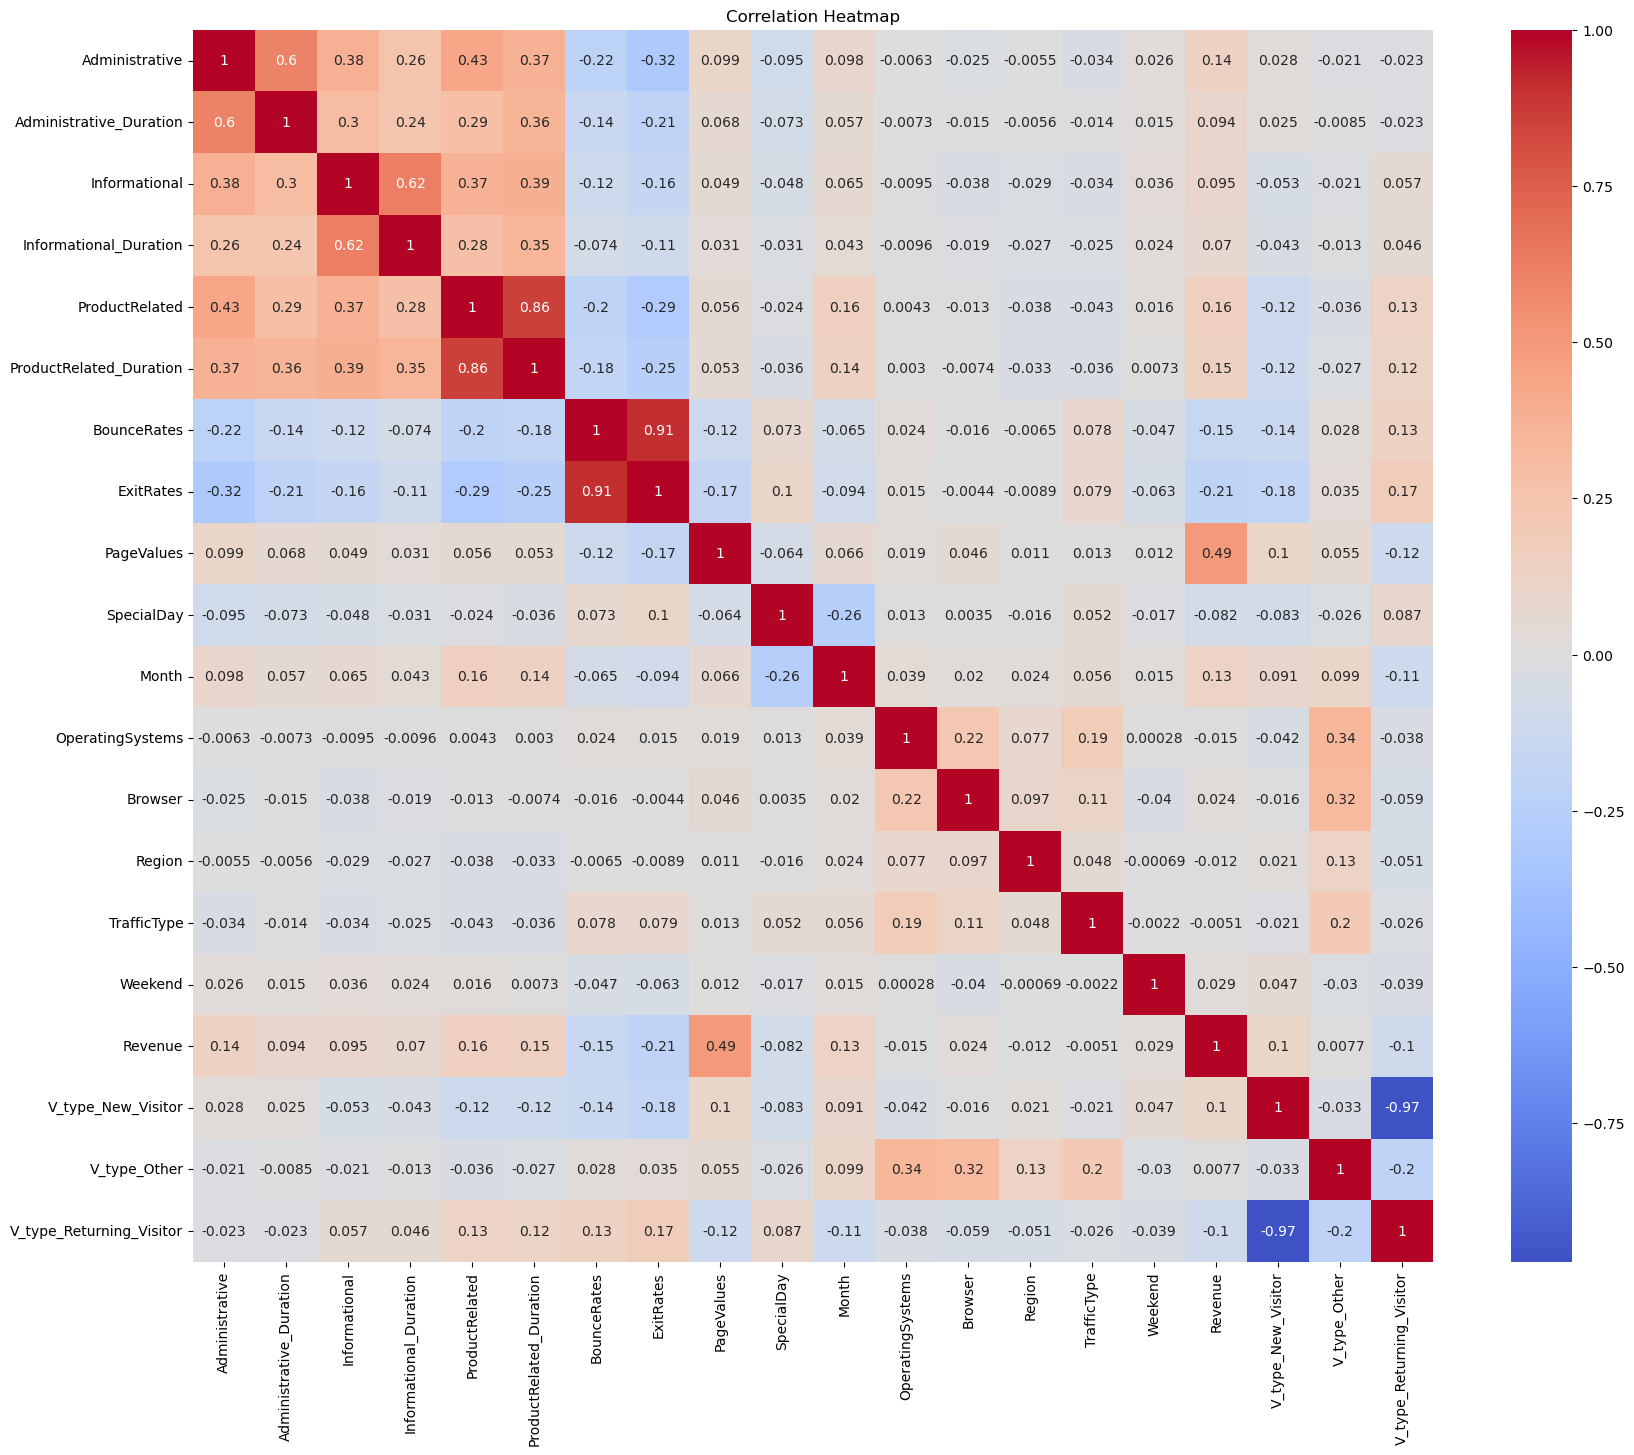

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,V_type_New_Visitor,V_type_Other,V_type_Returning_Visitor
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.098092,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917,0.028449,-0.021184,-0.022884
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.056891,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587,0.025043,-0.008542,-0.022525
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.065079,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200,-0.053429,-0.021457,0.057399
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.043469,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345,-0.043200,-0.013489,0.045501
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.160138,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538,-0.122727,-0.036083,0.128738
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.140064,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373,-0.116447,-0.027183,0.120489
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.064823,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673,-0.139351,0.028112,0.129908
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.093698,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071,-0.183898,0.034763,0.171987
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.066204,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569,0.104952,0.055204,-0.115825
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.261537,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305,-0.082740,-0.025730,0.087123


In [59]:
# Correlation Matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix

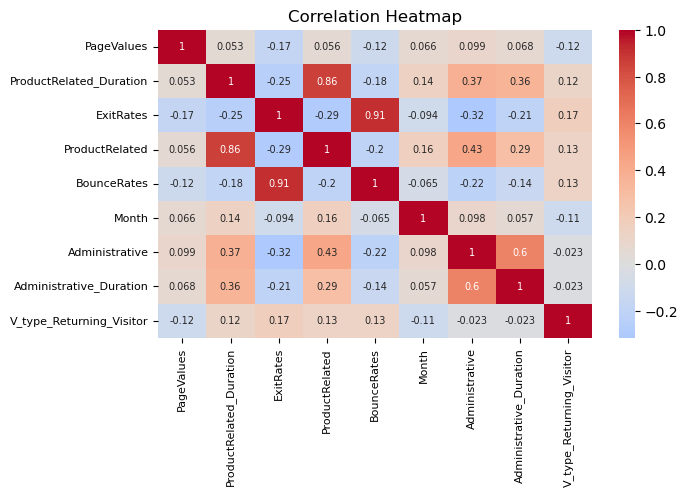

,PageValues,ProductRelated_Duration,ExitRates,ProductRelated,BounceRates,Month,Administrative,Administrative_Duration,V_type_Returning_Visitor
PageValues,1.000000,0.052823,-0.174498,0.056282,-0.119386,0.066204,0.098990,0.067608,-0.115825
ProductRelated_Duration,0.052823,1.000000,-0.251984,0.860927,-0.184541,0.140064,0.373939,0.355422,0.120489
ExitRates,-0.174498,-0.251984,1.000000,-0.292526,0.913004,-0.093698,-0.316483,-0.205798,0.171987
ProductRelated,0.056282,0.860927,-0.292526,1.000000,-0.204578,0.160138,0.431119,0.289087,0.128738
BounceRates,-0.119386,-0.184541,0.913004,-0.204578,1.000000,-0.064823,-0.223563,-0.144170,0.129908
Month,0.066204,0.140064,-0.093698,0.160138,-0.064823,1.000000,0.098092,0.056891,-0.112198
Administrative,0.098990,0.373939,-0.316483,0.431119,-0.223563,0.098092,1.000000,0.601583,-0.022884
Administrative_Duration,0.067608,0.355422,-0.205798,0.289087,-0.144170,0.056891,0.601583,1.000000,-0.022525
V_type_Returning_Visitor,-0.115825,0.120489,0.171987,0.128738,0.129908,-0.112198,-0.022884,-0.022525,1.000000


In [60]:
# Correlation Matrix and Heatmap
correlation_matrix = df[['PageValues','ProductRelated_Duration' , 'ExitRates','ProductRelated' ,'BounceRates','Month','Administrative','Administrative_Duration','V_type_Returning_Visitor']].corr()
plt.figure(figsize=(7, 4))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0 , annot_kws={'size': 7})
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix

In [61]:
data_without_null = df.dropna()

In [62]:
len(df)

12330

In [63]:
len(data_without_null)

12042

In [64]:
df = df.dropna()

In [29]:
# Define the models and their corresponding parameters for GridSearchCV
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 8 ,10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }
    }

}


print(models.items())

dict_items([('Random Forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 8, 10], 'min_samples_split': [2, 5, 10]}}), ('Boosting', {'model': GradientBoostingClassifier(), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7, 9]}})])


In [31]:
# Separate features and target
X = df.drop(dependent_variable, axis=1)
y = df[dependent_variable]

In [32]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train)/(len(X_train)+len(X_test)))

0.7999501743896362


In [36]:
y_test.value_counts()

0    2060
1     349
Name: Revenue, dtype: int64

In [37]:
2060/(2060+349)

0.8551266085512661

Grid Search Iteration
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
RandomForestClassifier(max_depth=8, n_estimators=50)


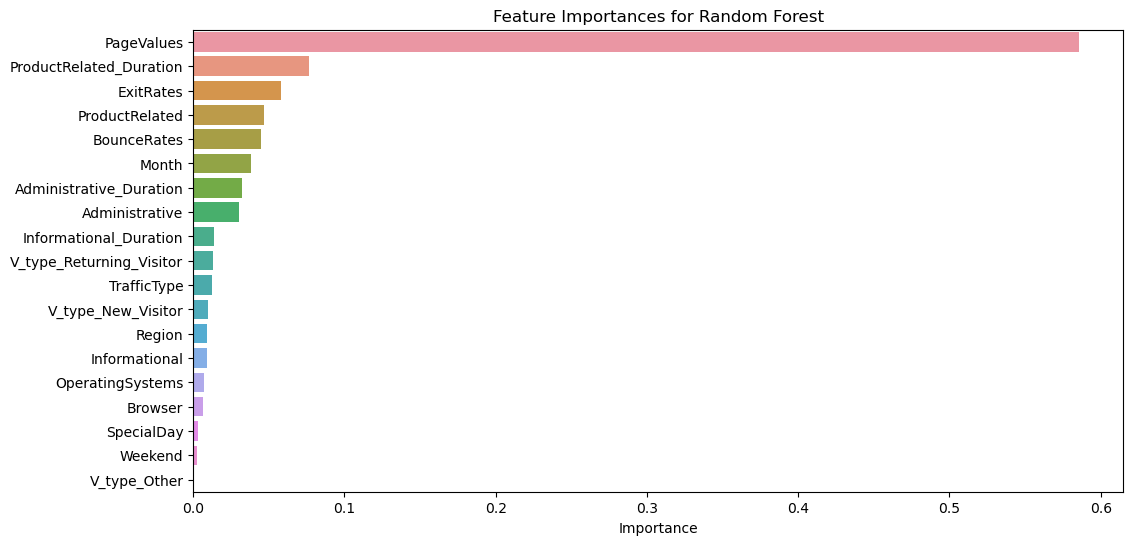

Grid Search Iteration
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
GradientBoostingClassifier(max_depth=5, n_estimators=50)


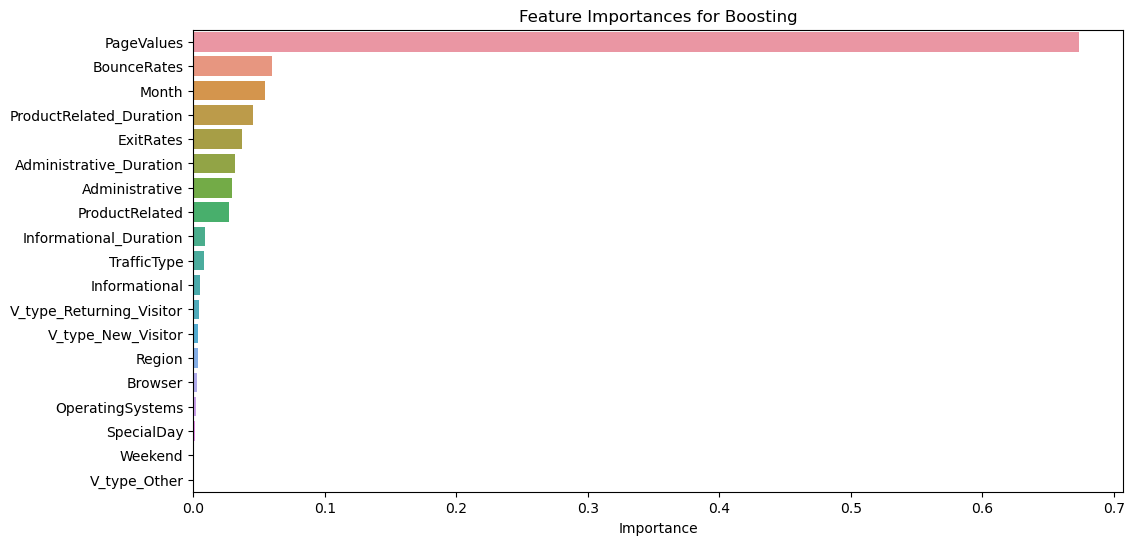

In [89]:
# Initialize a list to store the model performance

import pickle

performance_list = []
prediction_list = {'Random Forest' : {'Training' : [],
                                      'Testing' : []
                                     },
                   'Boosting' : {'Training' : [],
                                      'Testing' : []
                                     },
                   'KNN' : {'Training' : [],
                                      'Testing' : []
                                     }
                  }

for name, model in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    print('Grid Search Iteration')
    print(grid_search)
    grid_search.fit(X_train, y_train)
    
    # Train model with best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    print('best_model = ')
    print(best_model)
    
    # save the model to disk
    filename = name.replace(' ','') + '_model.sav'
    pickle.dump(best_model, open(filename, 'wb'))
    
    # Predict and calculate in-sample loss
    in_sample_preds = best_model.predict(X_train)
    in_sample_loss = mean_squared_error(y_train, in_sample_preds)
    
    
    # Predict and calculate out-of-sample loss
    out_of_sample_preds = best_model.predict(X_test)
    out_of_sample_loss = mean_squared_error(y_test, out_of_sample_preds)
    
    prediction_list[name]['Training'] += list(in_sample_preds)
    prediction_list[name]['Testing'] += list(out_of_sample_preds)
    
    # Append model performance to the list
    performance_list.append({
        "Model": name, 
        "Best Parameters": grid_search.best_params_, 
        "In-Sample Loss": in_sample_loss,
        "Out-of-Sample Loss": out_of_sample_loss
    })
    
    # Calculate and print feature importances
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
    plt.title(f'Feature Importances for {name}')
    plt.show()

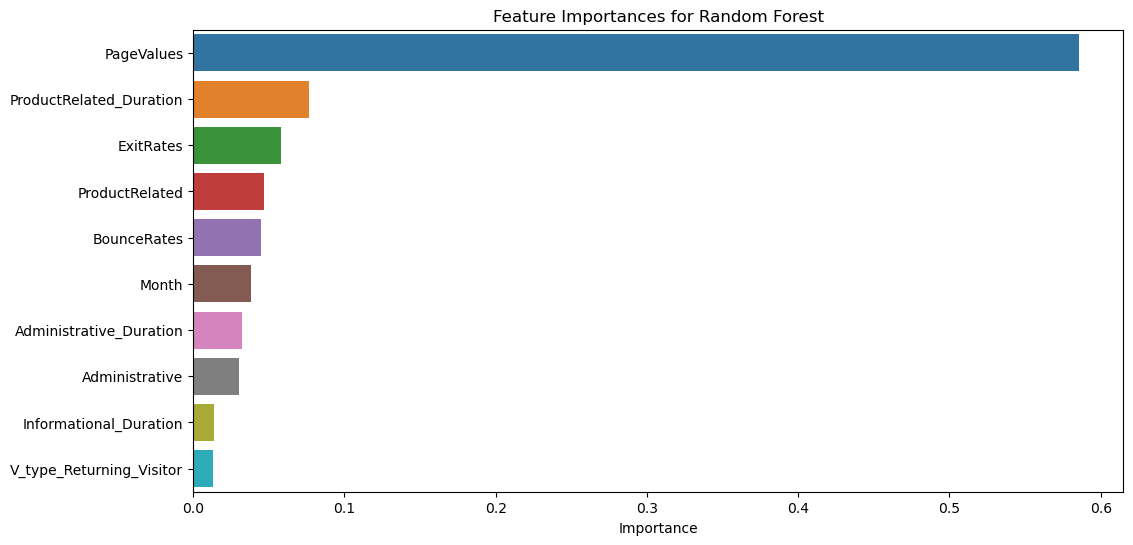

In [90]:
# Calculate and print feature importances (top 10 :Random Forest)

loaded_model = pickle.load(open('RandomForest_model.sav', 'rb'))


feature_importances = loaded_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
name = "Random Forest"
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index[:10], data=importance_df.head(10))
plt.title(f'Feature Importances for {name}')
plt.show()



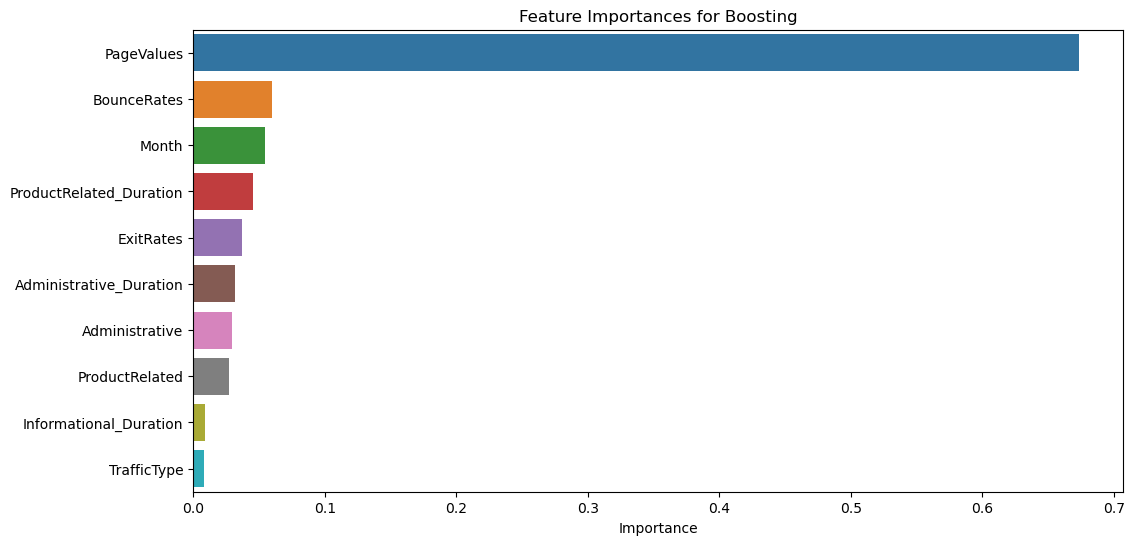

In [91]:
# Calculate and print feature importances (top 10 : Boosting)

loaded_model = pickle.load(open('Boosting_model.sav', 'rb'))


feature_importances = loaded_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
name = "Boosting"
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index[:10], data=importance_df.head(10))
plt.title(f'Feature Importances for {name}')
plt.show()



In [92]:
# Convert list to DataFrame and print model performances as a table
performance_df = pd.DataFrame(performance_list)
print(performance_df.to_markdown(index=False))

# Print the footnotes
print("\n\nFootnotes:")
print("Model - The type of model used.")
print("Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.")
print("In-Sample Loss - The mean squared error loss of the model on the training data.")
print("Out-of-Sample Loss - The mean squared error loss of the model on the test data.")

| Model         | Best Parameters                                              |   In-Sample Loss |   Out-of-Sample Loss |
|:--------------|:-------------------------------------------------------------|-----------------:|---------------------:|
| Random Forest | {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 50} |        0.0748469 |            0.0971357 |
| Boosting      | {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}   |        0.0680992 |            0.0913242 |


Footnotes:
Model - The type of model used.
Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.
In-Sample Loss - The mean squared error loss of the model on the training data.
Out-of-Sample Loss - The mean squared error loss of the model on the test data.


In [93]:
# KNN MODEL Creation for different values of K

import pickle
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
i = list(range(5,205,5))  # Number of neighbors to consider (you can tune this value)
for k in i:
    print('k= ',k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_class = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_class)
    
    # save the model to disk
    filename = 'knn_model_' + str(k) + '.sav'
    pickle.dump(knn_classifier, open(filename, 'wb'))
    
    # Predict and calculate in-sample loss
    knn_in_sample_preds_class = knn_classifier.predict(X_train)
    knn_in_sample_loss_class = mean_squared_error(y_train, knn_in_sample_preds_class)
    
    # Predict and calculate out-of-sample loss
    knn_out_of_sample_preds_class = knn_classifier.predict(X_test)
    knn_out_of_sample_loss_class = mean_squared_error(y_test, knn_out_of_sample_preds_class)
    
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    print('Classifier in sample loss='  , knn_in_sample_loss_class)
    print('Classifier out of sample loss=' , knn_out_of_sample_loss_class)
#     print('Regressor in sample loss='  , in_sample_loss)
#     print('Regressor out of sample loss=' , out_of_sample_loss)
    print('======================')

k=  5
Accuracy: 0.8663345786633457
Mean Squared Error: 0.1336654213366542
Classifier in sample loss= 0.11003840963355134
Classifier out of sample loss= 0.1336654213366542
k=  10
Accuracy: 0.8779576587795765
Mean Squared Error: 0.12204234122042341
Classifier in sample loss= 0.12841274784594622
Classifier out of sample loss= 0.12204234122042341
k=  15
Accuracy: 0.8754669987546699
Mean Squared Error: 0.12453300124533001
Classifier in sample loss= 0.1318384719194436
Classifier out of sample loss= 0.12453300124533001
k=  20
Accuracy: 0.8750518887505189
Mean Squared Error: 0.12494811124948112
Classifier in sample loss= 0.1370289629398941
Classifier out of sample loss= 0.12494811124948112
k=  25
Accuracy: 0.8733914487339145
Mean Squared Error: 0.1266085512660855
Classifier in sample loss= 0.1397280182705284
Classifier out of sample loss= 0.1266085512660855
k=  30
Accuracy: 0.8717310087173101
Mean Squared Error: 0.12826899128268993
Classifier in sample loss= 0.1425308834215717
Classifier out o

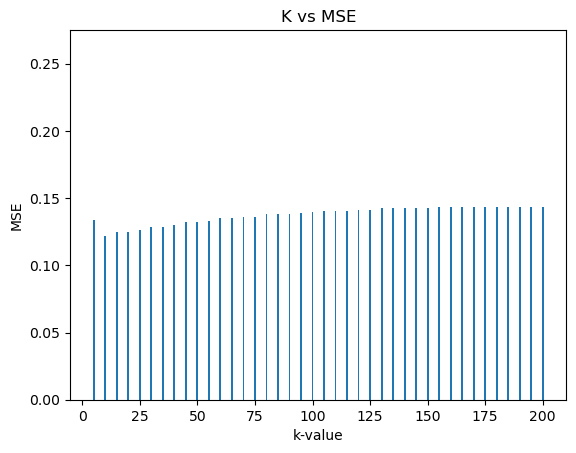

In [33]:
# Plotting graph between K and MSE on testing dataset to check most optimal k value
import pickle

knn_k_dict = {}

for i in list(range(5,205,5)) :
    loaded_model = pickle.load(open('knn_model_'+str(i)+'.sav', 'rb'))
    y_pred_test = loaded_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    knn_k_dict[i] = mse
    
categories = list(knn_k_dict.keys())
values = list(knn_k_dict.values())

# Create a bar plot
plt.bar(categories, values)

# Optionally, you can add labels and a title to the plot
plt.xlabel('k-value')
plt.ylabel('MSE')
plt.title('K vs MSE')
plt.ylim(0,0.275)

# Display the plot
plt.show()

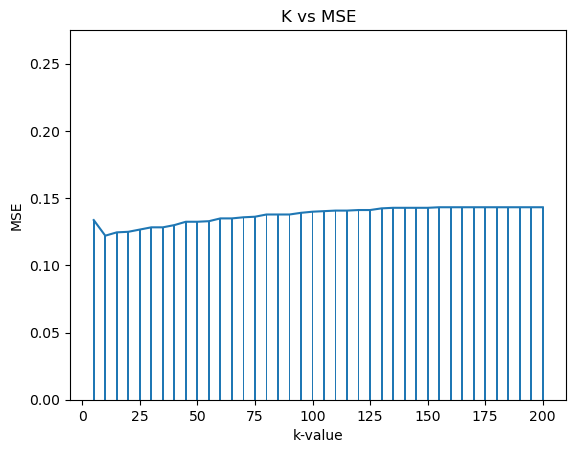

In [34]:
# Create a Line plot
plt.plot(categories, values)
plt.bar(categories, values)
# Optionally, you can add labels and a title to the plot
plt.xlabel('k-value')
plt.ylabel('MSE')
plt.title('K vs MSE')
plt.ylim(0,0.275)

# Display the plot
plt.show()

In [97]:
my_dict = {k: v for k, v in zip(categories, values)}

In [98]:
min(my_dict, key=lambda k: my_dict[k])

10

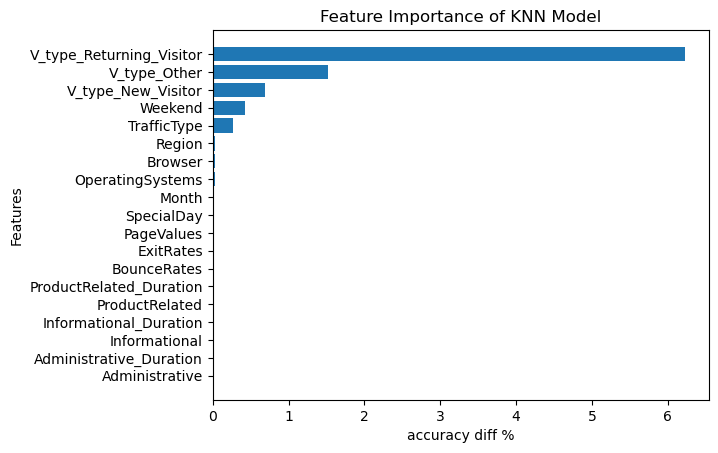

In [141]:
# Calculating Feature importance equivalent for KNN model through feature permutation technique on training data

from sklearn.metrics import accuracy_score
import numpy as np

list_columns = list(df.columns)[1:]

loaded_model = pickle.load(open('knn_model_10.sav', 'rb'))
y_pred_train = loaded_model.predict(X_train)


# Calculate the accuracy on the training dataset
baseline_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate feature importance based on feature permutation
feature_importance = {}
for i in list(X_train.columns):
    #print("feature =  " , i)
    X_train_permuted = X_train.copy()
    X_train_permuted[i] = np.random.permutation(X_train_permuted[i].values)
    permuted_accuracy = accuracy_score(y_train, loaded_model.predict(X_train_permuted))
    feature_importance[i] = abs(permuted_accuracy-baseline_accuracy)*100/baseline_accuracy
    
    
# Plot the feature importance
feature_names = [i for i in list(X_train.columns)]
sorted_indices = np.argsort(list(feature_importance.values()))

# Sort the feature_names and feature_importance based on sorted_indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[feature_names[i]] for i in sorted_indices]


plt.barh(feature_names, sorted_feature_importance)
plt.xlabel('accuracy diff %')
plt.ylabel('Features')
plt.title('Feature Importance of KNN Model')
plt.show()

In [100]:
df2 = pd.concat([X_test,y_test] , axis = 1)

# loading models for predicting on test data
# model_list = ['knn_model_100.sav','Boosting_model.sav','RandomForest_model.sav']
model_list = {'knn_model_10.sav':'knn_10_pred' , 'Boosting_model.sav':'boosting_pred' , 'RandomForest_model.sav':'random_forest_pred'}

for i in model_list.keys():
    loaded_model = pickle.load(open(i, 'rb'))
    result = loaded_model.predict(X_test)
    score_series = pd.Series(result , index = df2.index)
    df2[model_list[i]] = score_series
    
# Summarizing predictions and actual value rank-ordering for all the variables in test data (mean values) 

for i in list(df2.columns):
    print('Variable = ' , i)
    print(df2.groupby(i).aggregate({dependent_variable:'mean','knn_10_pred':'mean','boosting_pred':'mean','random_forest_pred':'mean'}))
    print('===========================')

Variable =  Administrative
                 Revenue  knn_10_pred  boosting_pred  random_forest_pred
Administrative                                                          
0               0.085271     0.042205       0.080965            0.078381
1               0.195021     0.041494       0.174274            0.136929
2               0.165939     0.056769       0.165939            0.122271
3               0.184358     0.039106       0.184358            0.167598
4               0.207407     0.051852       0.125926            0.103704
5               0.165217     0.034783       0.182609            0.156522
6               0.258824     0.000000       0.223529            0.152941
7               0.111111     0.074074       0.111111            0.055556
8               0.185185     0.000000       0.111111            0.166667
9               0.367347     0.020408       0.244898            0.183673
10              0.250000     0.000000       0.125000            0.125000
11              0.157895

In [66]:
# Calculate Accuracy and Recall for the models
# load the model from disk
from sklearn.metrics import recall_score
model_list = ['RandomForest_model.sav' , 'Boosting_model.sav' , 'knn_model_15.sav']
for i in model_list:
    print("Model = " , i[:-4])
    loaded_model = pickle.load(open(i, 'rb'))
    result = loaded_model.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    recall = recall_score(y_test,result)
    print("Model Accuracy:", accuracy)
    print("Model Recall:", recall)
    print("==========")

Model =  RandomForest_model
Model Accuracy: 0.9028642590286425
Model Recall: 0.5415472779369628
Model =  Boosting_model
Model Accuracy: 0.908675799086758
Model Recall: 0.6275071633237822
Model =  knn_model_15
Model Accuracy: 0.8754669987546699
Model Recall: 0.22063037249283668


Accuracy: 0.8899958488999585
Recall value: 0.36962750716332377
Confusion Matrix:
[[2015   45]
 [ 220  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2060
           1       0.74      0.37      0.49       349

    accuracy                           0.89      2409
   macro avg       0.82      0.67      0.72      2409
weighted avg       0.88      0.89      0.87      2409

Administrative: 0.0046
Administrative_Duration: 0.0432
Informational: 0.0616
Informational_Duration: 0.0216
ProductRelated: 0.1692
ProductRelated_Duration: 0.0978
BounceRates: 0.1099
ExitRates: 0.7772
PageValues: 1.4519
SpecialDay: 0.1171
Month: 0.3175
OperatingSystems: 0.0687
Browser: 0.0727
Region: 0.0499
TrafficType: 0.0162
Weekend: 0.0624
V_type_New_Visitor: 0.0669
V_type_Other: 0.0584
V_type_Returning_Visitor: 0.0508


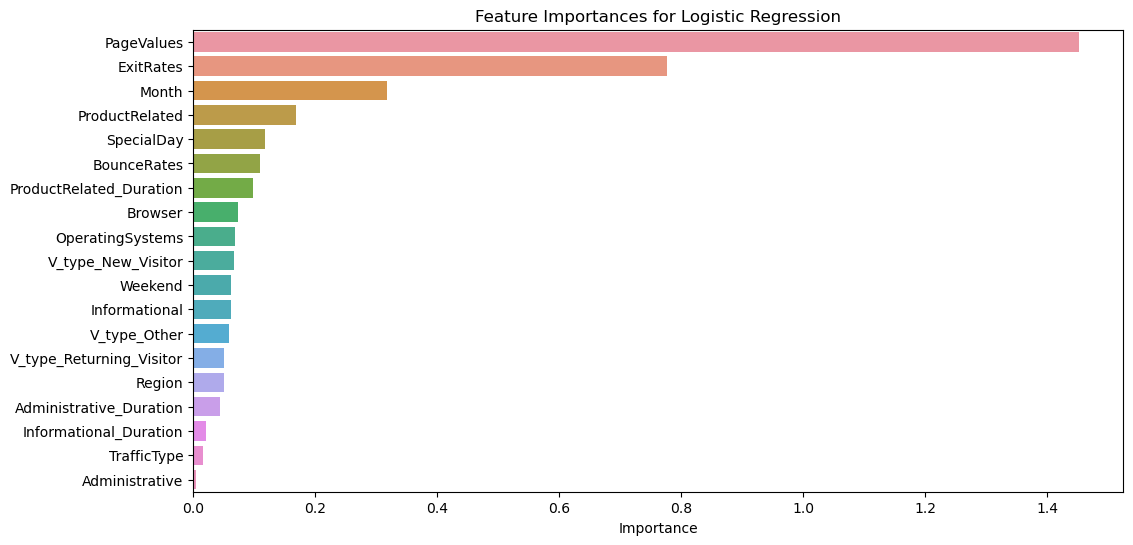

In [67]:
#logistic regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

recall = recall_score(y_test, y_pred)
print(f"Recall value: {recall}")


confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Get the coefficients (feature importance) of the model
feature_importances = abs(logreg_model.coef_[0])

# Print feature importance
for feature, importance in zip(list(X_train.columns), feature_importances):
    print(f"{feature}: {importance:.4f}")


# Calculate and print feature importances
# feature_importances = logreg_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
plt.title('Feature Importances for Logistic Regression')
plt.show()

#### LASSO Logistic Regression

Accuracy: 0.8899958488999585
Recall value: 0.36962750716332377
Confusion Matrix:
[[2015   45]
 [ 220  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2060
           1       0.74      0.37      0.49       349

    accuracy                           0.89      2409
   macro avg       0.82      0.67      0.72      2409
weighted avg       0.88      0.89      0.87      2409

Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False]
Administrative: 0.0036
Administrative_Duration: 0.0424
Informational: 0.0591
Informational_Duration: 0.0195
ProductRelated: 0.1688
ProductRelated_Duration: 0.0967
BounceRates: 0.0845
ExitRates: 0.7863
PageValues: 1.4522
SpecialDay: 0.1151
Month: 0.3167
OperatingSystems: 0.0676
Browser: 0.0711
Region: 0.0488
TrafficType: 0.0141
Weekend: 0.0613
V_type_New_Visitor: 0.1159
V_type_Other: 0.0430
V_type_Return

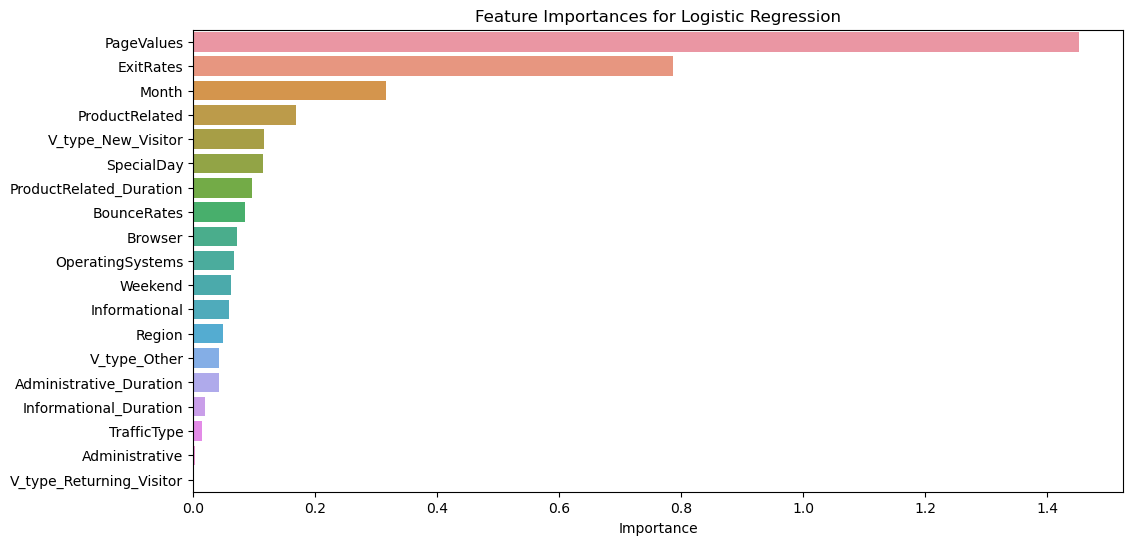

In [68]:
# LASSO Logistic Regression
from sklearn.feature_selection import SelectFromModel

# Create a logistic regression model with Lasso regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print(f"Recall value: {recall}")


confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Use SelectFromModel to get feature importance based on Lasso regularization
model = SelectFromModel(logreg, prefit=True)
selected_features = model.get_support()

# Print selected features
print("Selected features:", selected_features)

# Get the coefficients (feature importance) of the model
feature_importances = abs(logreg.coef_[0])

# Print feature importance
for feature, importance in zip(list(X_train.columns), feature_importances):
    print(f"{feature}: {importance:.4f}")


# Calculate and print feature importances
# feature_importances = logreg_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
plt.title('Feature Importances for Logistic Regression')
plt.show()

In [69]:
# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Define parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],  # L1 and L2 penalties
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.8899958488999585


In [70]:
# Calculate and print feature importances (top 10 : Boosting)

# loaded_model = pickle.load(open('Boosting_model.sav', 'rb'))

loaded_model = best_model
feature_importances = loaded_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
name = "Boosting"
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index[:10], data=importance_df.head(10))
plt.title(f'Feature Importances for {name}')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

Recall value: 0.36962750716332377
Confusion Matrix:
[[2015   45]
 [ 220  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2060
           1       0.74      0.37      0.49       349

    accuracy                           0.89      2409
   macro avg       0.82      0.67      0.72      2409
weighted avg       0.88      0.89      0.87      2409

Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False]
Administrative: 0.0036
Administrative_Duration: 0.0424
Informational: 0.0591
Informational_Duration: 0.0195
ProductRelated: 0.1688
ProductRelated_Duration: 0.0966
BounceRates: 0.0845
ExitRates: 0.7862
PageValues: 1.4522
SpecialDay: 0.1151
Month: 0.3167
OperatingSystems: 0.0676
Browser: 0.0711
Region: 0.0488
TrafficType: 0.0141
Weekend: 0.0613
V_type_New_Visitor: 0.1159
V_type_Other: 0.0430
V_type_Returning_Visitor: 0.0000


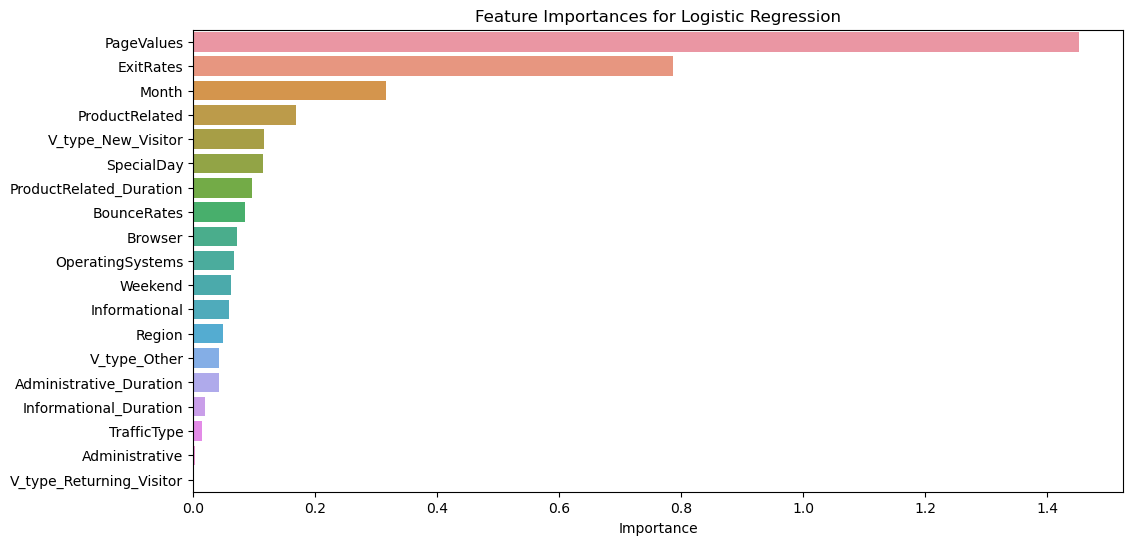

In [147]:
recall = recall_score(y_test, y_pred)
print(f"Recall value: {recall}")


confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Use SelectFromModel to get feature importance based on Lasso regularization
model = SelectFromModel(best_model, prefit=True)
selected_features = model.get_support()

# Print selected features
print("Selected features:", selected_features)

# Get the coefficients (feature importance) of the model
feature_importances = abs(best_model.coef_[0])

# Print feature importance
for feature, importance in zip(list(X_train.columns), feature_importances):
    print(f"{feature}: {importance:.4f}")


# Calculate and print feature importances
# feature_importances = logreg_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
plt.title('Feature Importances for Logistic Regression')
plt.show()

In [103]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### Neural Network

In [149]:
from sklearn.neural_network import MLPClassifier

# Step 3: Neural Network Model Creation
nn_model = MLPClassifier(random_state=42)

# Step 4: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(nn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Evaluation
best_nn_model = grid_search.best_estimator_
y_pred = best_nn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.8958073889580739


In [150]:
grid_search.best_params_

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}

In [151]:
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
recall = recall_score(y_test,y_pred)
print("NN Best Model Accuracy:", accuracy)
print("NN Best Model MSE:", mse)
print("NN Best Model Recall:", recall)

NN Best Model Accuracy: 0.8958073889580739
NN Best Model MSE: 0.1041926110419261
NN Best Model Recall: 0.5845272206303725


In [152]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1954  106]
 [ 145  204]]


In [157]:
y_pred_reg = best_nn_model.predict_proba(X_test)
y_pred = best_nn_model.predict(X_test)

In [168]:
y_test.value_counts()

0    2060
1     349
Name: Revenue, dtype: int64

In [187]:
y_pred_reg

array([[0.88913138, 0.11086862],
       [0.97554092, 0.02445908],
       [0.98101415, 0.01898585],
       ...,
       [0.74753425, 0.25246575],
       [0.26728746, 0.73271254],
       [0.99896281, 0.00103719]])

In [174]:
pd.Series(y_pred).value_counts()

0    2099
1     310
dtype: int64

In [179]:
y_pred_reg2

array([], dtype=float64)

In [162]:
y_pred.mean()

0.12868410128684102

In [2]:
from sklearn.metrics import confusion_matrix
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [38]:
best_nn_model

NameError: name 'best_nn_model' is not defined